In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import sympy as sp
from sympy.abc import x, y, z

In [80]:
def _normalize_covariate_data(covariate_data, exclude_columns=[]):
    included_filter = np.ones(covariate_data.shape[1])
    included_filter[exclude_columns] = 0
    excluded_filter = 1 - included_filter

    X_min = np.min(covariate_data, axis=0)
    X_max = np.max(covariate_data, axis=0)

    # Amount to shift columns. Excluded cols shift 0.
    column_shifts = (-1*X_min) * included_filter

    # Amount to scale columns. Excluded cols scale by 1.
    column_scales = ((X_max - X_min) * included_filter) + excluded_filter

    normalized_data = (covariate_data + column_shifts)/column_scales
    scaled_data = (normalized_data * ((2*included_filter) + excluded_filter)) - (1*included_filter)
    
    return scaled_data

In [81]:
x = np.random.normal(loc=0, scale=10, size=(300, 2))

(array([ 1.,  6., 17., 40., 65., 69., 53., 36.,  8.,  5.]),
 array([-31.83189311, -25.84321441, -19.85453571, -13.86585701,
         -7.87717831,  -1.88849961,   4.10017909,  10.08885779,
         16.07753649,  22.06621519,  28.05489389]),
 <a list of 10 Patch objects>)

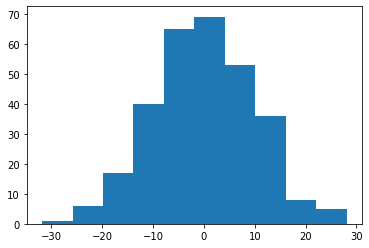

In [86]:
plt.hist(x[:, 1])

(array([ 1.,  6., 17., 40., 65., 69., 53., 36.,  8.,  5.]),
 array([-31.83189311, -25.84321441, -19.85453571, -13.86585701,
         -7.87717831,  -1.88849961,   4.10017909,  10.08885779,
         16.07753649,  22.06621519,  28.05489389]),
 <a list of 10 Patch objects>)

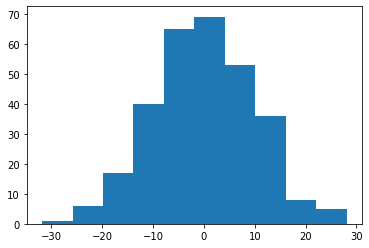

In [87]:
plt.hist(_normalize_covariate_data(x, exclude_columns=[1])[:, 1])

In [136]:
a = np.random.random((1000000, 3))
data = pd.DataFrame(data=a, columns=["x", "y", "z"])
data.head()

,x,y,z
0,0.784854,0.593830,0.567931
1,0.019188,0.141319,0.353203
2,0.867043,0.526057,0.960125
3,0.627109,0.161849,0.474873
4,0.008036,0.846005,0.365658


In [142]:
expression = x + y + z
free_symbols = list(expression.free_symbols)
core_func = sp.lambdify(
        free_symbols,
        expression,
        "numpy",
        dummify=False)
free_symbol_names = [str(sym) for sym in free_symbols]

In [143]:
%%time
wrapper_func = lambda arg_arr: core_func(*arg_arr)
np.apply_along_axis(wrapper_func, 1, data[free_symbol_names])

CPU times: user 5.53 s, sys: 0 ns, total: 5.53 s
Wall time: 5.55 s


array([1.94661549, 0.51370941, 2.35322373, ..., 1.03596436, 1.60924019,
       1.99945153])

In [168]:
x_36 = np.ones(30)
np.select([np.less(x_36, 0.282),True], [0,0.706*x_36], default=np.nan)
(
    np.maximum(
        (-2.19722457733622,
         np.minimum(
             (2.19722457733622,
              1.07829157280687*np.select([np.less(x_36, 0.282),True], [0,0.706*x_36], default=np.nan) + 0.549896018969459)
         )
        )
    )
)

ValueError: invalid number of arguments

In [193]:
from sympy.abc import x, y, z
from sympy.functions import sin, Max
from sympy.utilities.lambdify import lambdify

def test():
    pass

a = lambdify(x, Max(x, 1), [{"amax": lambda x: np.maximum(*x)}, "numpy"])
??a
a(0)

1

In [165]:
np.min(1, data["x"].to_numpy())

TypeError: only integer scalar arrays can be converted to a scalar index

In [157]:
%%timeit

column_data = [data[str(sym)] for sym in free_symbols]

# column_data = np.hsplit(
#     data[free_symbol_names].to_numpy(),
#     len(free_symbol_names))
    
# d = np.hsplit(data[free_symbol_names].to_numpy(), len(free_symbol_names))
# d.shape()
core_func(*column_data)

3.34 ms ± 976 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
